In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


In [150]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [152]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [153]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [156]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

import pandas as pd
import matplotlib.pyplot as plt

In [157]:
value_counts = {}
cols_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in cols_list:
    value_counts[column] = train_data[column].value_counts()

# Display the unique values for each column
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print("-" * 50)

Column: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
--------------------------------------------------
Column: Sex
Sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------
Column: SibSp
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
--------------------------------------------------
Column: Parch
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
--------------------------------------------------
Column: Embarked
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
--------------------------------------------------


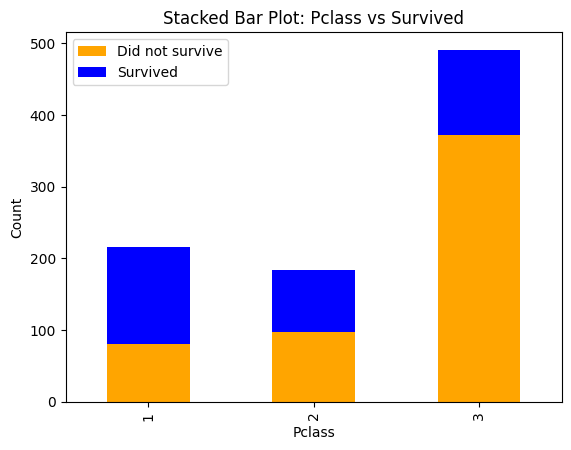

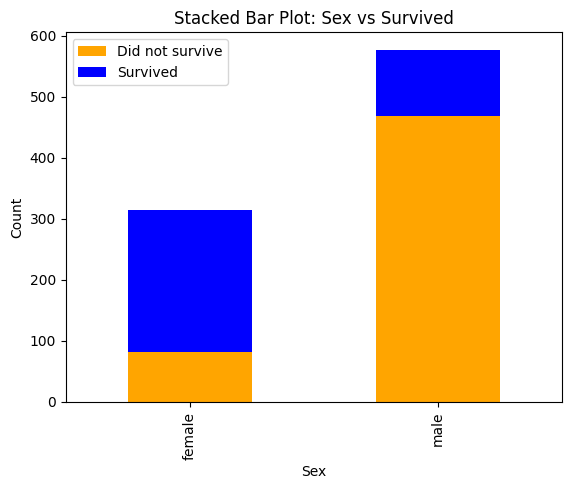

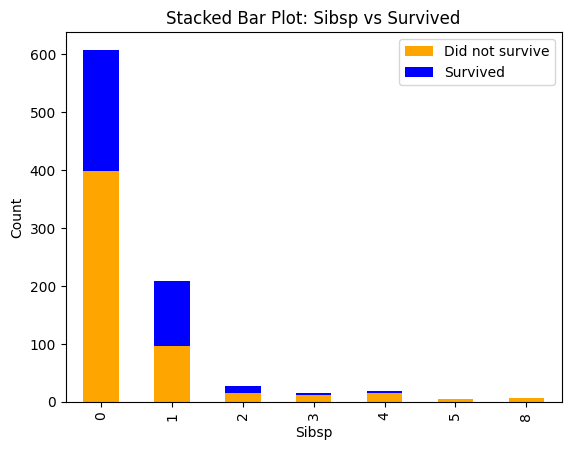

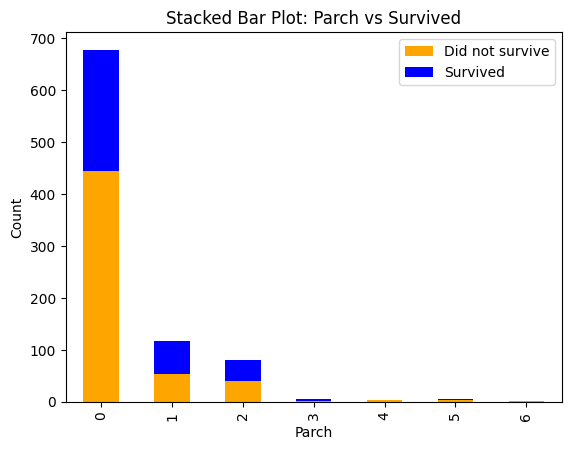

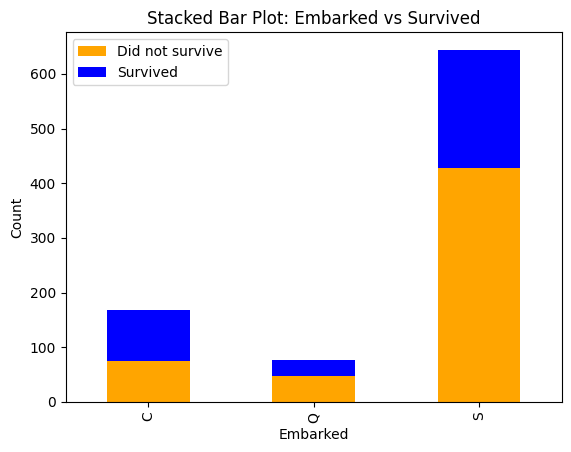

In [158]:
# Define a function to create a stacked bar plot

def stacked_bar_plot(column):
    cross_tab = pd.crosstab(train_data[column], train_data['Survived'])

    # Create a stacked bar plot
    cross_tab.plot(kind='bar', stacked=True, color=['orange', 'blue'])

    plt.title(f'Stacked Bar Plot: {column.capitalize()} vs Survived')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(['Did not survive', 'Survived'])
    plt.show()
    
for column in cols_list:
    stacked_bar_plot(column)

#### Extract Title from Name

In [159]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [160]:
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [161]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'the Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')

In [162]:
train_data['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [163]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [164]:
test_data['Title'] = test_data['Title'].replace(['Col', 'Rev', 'Ms', 'Dr', 'Dona'], 'Other')

In [165]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: count, dtype: int64

#### Extract Family_Size

In [166]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_Size'] = test_data['SibSp'] + test_data['Parch'] + 1

In [167]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1


#### Extract Cabin Letter from Cabin Column

In [168]:
train_data['Cabin_Letter'] = train_data['Cabin'].str[0]
train_data['Cabin_Letter'] = train_data['Cabin_Letter'].fillna('Unknown')
train_data['Cabin_Letter'].value_counts()

Cabin_Letter
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

In [169]:
test_data['Cabin_Letter'] = test_data['Cabin'].str[0]
test_data['Cabin_Letter'] = test_data['Cabin_Letter'].fillna('Unknown')
test_data['Cabin_Letter'].value_counts()

Cabin_Letter
Unknown    327
C           35
B           18
D           13
E            9
F            8
A            7
G            1
Name: count, dtype: int64

In [170]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Title         891 non-null    object 
 13  Family_Size   891 non-null    int64  
 14  Cabin_Letter  891 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [171]:
# Extracting Ticket Prefix & Ticket Length
train_data['Ticket_Prefix'] = train_data['Ticket'].str.extract('([A-Za-z]+)', expand=False)
train_data['Ticket_Length'] = train_data['Ticket'].str.len()

test_data['Ticket_Prefix'] = test_data['Ticket'].str.extract('([A-Za-z]+)', expand=False)
test_data['Ticket_Length'] = test_data['Ticket'].str.len()


In [172]:
train_data['Ticket_Prefix'].value_counts()

Ticket_Prefix
PC       60
C        33
A        29
STON     18
SOTON    17
S        14
CA       14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
SO        1
Fa        1
SW        1
SCO       1
Name: count, dtype: int64

In [173]:
test_data['Ticket_Prefix'].value_counts()

Ticket_Prefix
PC       32
C        22
SC       12
A        11
SOTON    10
CA        8
S         7
W         6
F         6
STON      4
AQ        2
PP        1
LP        1
Name: count, dtype: int64

In [174]:
# Define the mapping dictionary for Ticket_Prefix
ticket_prefix_mapping = {
    'PC': 1, 'C': 2, 'A': 3, 'STON': 4, 'SOTON': 5, 'S': 6, 'CA': 7,
    'SC': 8, 'W': 9, 'F': 10, 'LINE': 11, 'PP': 12, 'P': 12, 'WE': 13,
    'SO': 13, 'Fa': 13, 'SW': 13, 'SCO': 13, 'AQ': 13, 'LP': 13, '12': 13
}

# Apply the mapping using replace()
train_data.replace({'Ticket_Prefix': ticket_prefix_mapping}, inplace=True)
test_data.replace({'Ticket_Prefix': ticket_prefix_mapping}, inplace=True)

# Fill NA values in 'Ticket_Prefix' with 0
train_data['Ticket_Prefix'].fillna(0, inplace=True)
test_data['Ticket_Prefix'].fillna(0, inplace=True)

In [175]:

cols_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']

train_data = train_data.drop(columns=[col for col in cols_to_drop if col in train_data.columns])
passenger_ids = test_data['PassengerId'] # Extract PassengerId for the final submission
test_data = test_data.drop(columns=[col for col in cols_to_drop if col in test_data.columns])

In [176]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Size,Cabin_Letter,Ticket_Prefix,Ticket_Length
0,0,3,male,22.0,7.2500,S,Mr,2,Unknown,3.0,9
1,1,1,female,38.0,71.2833,C,Mrs,2,C,1.0,8
2,1,3,female,26.0,7.9250,S,Miss,1,Unknown,4.0,16
3,1,1,female,35.0,53.1000,S,Mrs,2,C,0.0,6
4,0,3,male,35.0,8.0500,S,Mr,1,Unknown,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Other,1,Unknown,0.0,6
887,1,1,female,19.0,30.0000,S,Miss,1,B,0.0,6
888,0,3,female,NaN,23.4500,S,Miss,4,Unknown,9.0,10
889,1,1,male,26.0,30.0000,C,Mr,1,C,0.0,6


In [177]:
test_data

,Pclass,Sex,Age,Fare,Embarked,Title,Family_Size,Cabin_Letter,Ticket_Prefix,Ticket_Length
0,3,male,34.5,7.8292,Q,Mr,1,Unknown,0.0,6
1,3,female,47.0,7.0000,S,Mrs,2,Unknown,0.0,6
2,2,male,62.0,9.6875,Q,Mr,1,Unknown,0.0,6
3,3,male,27.0,8.6625,S,Mr,1,Unknown,0.0,6
4,3,female,22.0,12.2875,S,Mrs,3,Unknown,0.0,7
...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,8.0500,S,Mr,1,Unknown,3.0,9
414,1,female,39.0,108.9000,C,Other,1,C,1.0,8
415,3,male,38.5,7.2500,S,Mr,1,Unknown,5.0,18
416,3,male,NaN,8.0500,S,Mr,1,Unknown,0.0,6


In [178]:
value_counts = {}
cols_list = ['Pclass', 'Sex', 'Age', 'Embarked', 'Title', 'Family_Size', 'Cabin_Letter', 'Ticket_Prefix', 'Ticket_Length']

for column in cols_list:
    value_counts[column] = test_data[column].value_counts()

# Display the unique values for each column
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print("-" * 50)

Column: Pclass
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
--------------------------------------------------
Column: Sex
Sex
male      266
female    152
Name: count, dtype: int64
--------------------------------------------------
Column: Age
Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64
--------------------------------------------------
Column: Embarked
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
--------------------------------------------------
Column: Title
Title
Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: count, dtype: int64
--------------------------------------------------
Column: Family_Size
Family_Size
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64
--------------------------------------------------
Column: Cabin_Letter
Cabin_Lett

In [179]:
train_data.replace({'Sex': {'male': 1, 'female': 0},
            'Embarked': {'C': 1, 'Q': 2, 'S': 3},
            'Title': {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5},
            'Cabin_Letter': {'Unknown': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}}, inplace=True)

In [180]:
test_data.replace({'Sex': {'male': 1, 'female': 0},
            'Embarked': {'C': 1, 'Q': 2, 'S': 3},
            'Title': {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5},
            'Cabin_Letter': {'Unknown': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}}, inplace=True)

In [181]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            714 non-null    float64
 4   Fare           891 non-null    float64
 5   Embarked       889 non-null    float64
 6   Title          891 non-null    int64  
 7   Family_Size    891 non-null    int64  
 8   Cabin_Letter   891 non-null    int64  
 9   Ticket_Prefix  891 non-null    float64
 10  Ticket_Length  891 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 76.7 KB


In [182]:
train_data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Size,Cabin_Letter,Ticket_Prefix,Ticket_Length
count,891.000000,891.000000,891.000000,714.000000,891.000000,889.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,2.535433,1.740741,1.904602,0.776655,1.118967,6.750842
std,0.486592,0.836071,0.477990,14.526497,49.693429,0.792088,1.052077,1.613459,1.590899,2.548714,2.745515
min,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,3.000000,1.000000,1.000000,0.000000,0.000000,6.000000
75%,1.000000,3.000000,1.000000,38.000000,31.000000,3.000000,2.000000,2.000000,0.000000,1.000000,7.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,3.000000,5.000000,11.000000,8.000000,13.000000,18.000000


In [183]:
test_data.describe()

,Pclass,Sex,Age,Fare,Embarked,Title,Family_Size,Cabin_Letter,Ticket_Prefix,Ticket_Length
count,418.000000,418.000000,332.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,35.627188,2.401914,1.748804,1.839713,0.717703,1.277512,6.875598
std,0.841838,0.481622,14.181209,55.907576,0.854496,1.018562,1.519072,1.508321,2.682123,2.821437
min,1.000000,0.000000,0.170000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
25%,1.000000,0.000000,21.000000,7.895800,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000
50%,3.000000,1.000000,27.000000,14.454200,3.000000,1.000000,1.000000,0.000000,0.000000,6.000000
75%,3.000000,1.000000,39.000000,31.500000,3.000000,2.000000,2.000000,0.000000,1.000000,8.000000
max,3.000000,1.000000,76.000000,512.329200,3.000000,5.000000,11.000000,7.000000,13.000000,18.000000


#### Handle missing values

In [184]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mean(), inplace=True)

test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [185]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Embarked       891 non-null    float64
 6   Title          891 non-null    int64  
 7   Family_Size    891 non-null    int64  
 8   Cabin_Letter   891 non-null    int64  
 9   Ticket_Prefix  891 non-null    float64
 10  Ticket_Length  891 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 76.7 KB


In [186]:
X = train_data.drop(columns='Survived')
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [187]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),  # SVC with probability=True for ROC AUC score
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0),
}

In [188]:
# a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])


In [189]:
# Prepare a list to store results
results_list = []

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC AUC score
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    return accuracy, precision, recall, f1, roc_auc

# Evaluate each model
for model_name, model in models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train, X_test, y_train, y_test)
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Convert results list to DataFrame
results = pd.DataFrame(results_list)

# Sort the DataFrame by 'ROC AUC'
results_sorted = results.sort_values(by='ROC AUC', ascending=False)

# Print sorted results
print(results_sorted)

                     Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
2        Gradient Boosting  0.832402   0.833333  0.743243  0.785714  0.904247
11                CatBoost  0.843575   0.819444  0.797297  0.808219  0.896139
7                 AdaBoost  0.815642   0.753086  0.824324  0.787097  0.893887
10                 XGBoost  0.832402   0.823529  0.756757  0.788732  0.892021
1            Random Forest  0.832402   0.833333  0.743243  0.785714  0.887838
8              Extra Trees  0.826816   0.802817  0.770270  0.786207  0.880051
0      Logistic Regression  0.787709   0.743243  0.743243  0.743243  0.877477
9                  Bagging  0.793296   0.776119  0.702703  0.737589  0.851223
5              Naive Bayes  0.782123   0.716049  0.783784  0.748387  0.846976
3   Support Vector Machine  0.670391   0.777778  0.283784  0.415842  0.830759
4      K-Nearest Neighbors  0.726257   0.686567  0.621622  0.652482  0.793758
6            Decision Tree  0.743017   0.684211  0.702703  0.693

# **Ensemble Technique: Voting Classifier**

In [190]:
# Select top-performing models
top_models = {
    'CatBoost': CatBoostClassifier(verbose=0),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in top_models.items()], voting='soft')

# Fit and evaluate the Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the results
print(f'Voting Classifier\n'
      f'Accuracy: {accuracy}\n'
      f'Precision: {precision}\n'
      f'Recall: {recall}\n'
      f'F1 Score: {f1}\n'
      f'ROC AUC: {roc_auc}')


Voting Classifier
Accuracy: 0.8491620111731844
Precision: 0.8309859154929577
Recall: 0.7972972972972973
F1 Score: 0.8137931034482759
ROC AUC: 0.9055341055341055


## **Stacking Technique**

In [191]:
# Select top-performing models
stacked_models = [
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Meta-model
meta_model = LogisticRegression()

# Create a Stacking Classifier
stacking_clf = StackingClassifier(estimators=stacked_models, final_estimator=meta_model, passthrough=True)

# Fit and evaluate the Stacking Classifier
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the results
print(f'Stacking Classifier \n'
      f'Accuracy: {accuracy}\n'
      f'Precision: {precision}\n'
      f'Recall: {recall}\n'
      f'F1 Score: {f1}\n'
      f'ROC AUC: {roc_auc}')


Stacking Classifier 
Accuracy: 0.8324022346368715
Precision: 0.8055555555555556
Recall: 0.7837837837837838
F1 Score: 0.7945205479452055
ROC AUC: 0.9060489060489062


In [192]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Age            418 non-null    float64
 3   Fare           418 non-null    float64
 4   Embarked       418 non-null    int64  
 5   Title          418 non-null    int64  
 6   Family_Size    418 non-null    int64  
 7   Cabin_Letter   418 non-null    int64  
 8   Ticket_Prefix  418 non-null    float64
 9   Ticket_Length  418 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 32.8 KB


**Final Submission Preparation**

In [193]:
best_model = voting_clf # best_model chosen based on Accuracy

y_test_pred = best_model.predict(test_data) # Make predictions

submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

In [195]:
df = pd.read_csv('submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
